In [1]:
# Head model and forward computation
# https://mne.tools/stable/auto_tutorials/forward/30_forward.html


In [1]:
import mne
from mne.datasets import sample
data_path = sample.data_path()

# the raw file containing the channel location + types
sample_dir = data_path / 'MEG' / 'sample'
raw_fname = sample_dir / 'sample_audvis_raw.fif'
# The paths to Freesurfer reconstructions
subjects_dir = data_path / 'subjects'
subject = 'fsaverage' # change it to use freesurfer's bem

Using surface: C:\Users\zhouz\mne_data\MNE-sample-data\subjects\fsaverage\bem\inner_skull.surf
Using surface: C:\Users\zhouz\mne_data\MNE-sample-data\subjects\fsaverage\bem\outer_skull.surf
Using surface: C:\Users\zhouz\mne_data\MNE-sample-data\subjects\fsaverage\bem\outer_skin.surf


c:\Users\zhouz\mne-python\1.3.1_0\envs\mne\lib\site-packages\mne\viz\utils.py:151: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


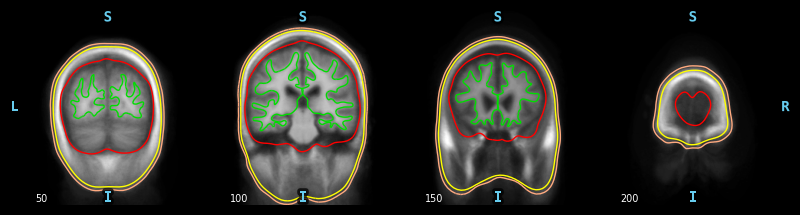

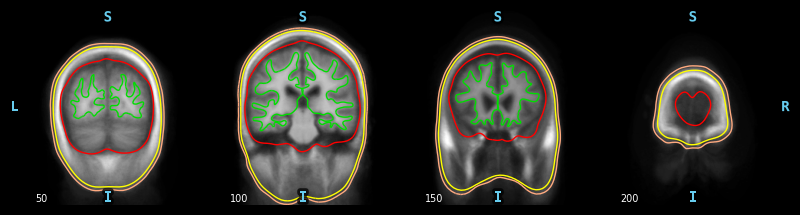

In [2]:
# Compute and visualize BEM surfaces
plot_bem_kwargs = dict(
    subject=subject, subjects_dir=subjects_dir,
    brain_surfaces='white', orientation='coronal',
    slices=[50, 100, 150, 200])

# change 'white' to 'pial' to get pial surface

mne.viz.plot_bem(**plot_bem_kwargs)

In [7]:
# visualizing the coregistration
# The transformation file obtained by coregistration
# trans = sample_dir / 'sample_audvis_raw-trans.fif'
# trans = 'fsaverage' 
# trans = '/home/zhibinz2/Documents/GitHub/MEG_EEG_Source_Localization/sample_fsaverage_trans.fif'
trans = 'sample_fsaverage_manual_trans.fif'
# trans = 'C:/Users/zhouz/GitHub/MEG_EEG_Source_Localization/sample_fsaverage_trans.fif'
info = mne.io.read_info(raw_fname)
# Here we look at the dense head, which isn't used for BEM computations but
# is useful for coregistration.
mne.viz.plot_alignment(info, trans, subject=subject, dig=True,
                       meg=['helmet', 'sensors'], subjects_dir=subjects_dir,
                       surfaces='head-dense')


    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle


Using pyvistaqt 3d backend.

Using fsaverage-head-dense.fif for head surface.
    1 BEM surfaces found
    Reading a surface...
[done]
    1 BEM surfaces read
Getting helmet for system 306m
Channel types::	grad: 203, mag: 102, eeg: 59


In [3]:
# Compute Source Space
# src = mne.setup_source_space(subject, spacing='oct4', add_dist='patch',
#                              subjects_dir=subjects_dir)
src = mne.setup_source_space(subject, spacing='all', add_dist='patch',
                             subjects_dir=subjects_dir)
# # Download fsaverage files
# import os.path as op
# from mne.datasets import fetch_fsaverage
# fs_dir = fetch_fsaverage(verbose=True)
# subjects_dir = op.dirname(fs_dir)
# src = op.join(fs_dir, "bem", "fsaverage-ico-5-src.fif")

# print(src)


Setting up the source space with the following parameters:

SUBJECTS_DIR = C:\Users\zhouz\mne_data\MNE-sample-data\subjects
Subject      = fsaverage
Surface      = white
Include all vertices

>>> 1. Creating the source space...

Loading C:\Users\zhouz\mne_data\MNE-sample-data\subjects\fsaverage\surf\lh.white...
    Triangle neighbors and vertex normals...
loaded lh.white 163842/163842 selected to source space (all)

Loading C:\Users\zhouz\mne_data\MNE-sample-data\subjects\fsaverage\surf\rh.white...
    Triangle neighbors and vertex normals...
loaded rh.white 163842/163842 selected to source space (all)

Calculating patch information (limit=0.0 mm)...
    Computing patch statistics...
    Patch information added...
    Computing patch statistics...
    Patch information added...
You are now one step closer to computing the gain matrix


Using surface: C:\Users\zhouz\mne_data\MNE-sample-data\subjects\fsaverage\bem\inner_skull.surf
Using surface: C:\Users\zhouz\mne_data\MNE-sample-data\subjects\fsaverage\bem\outer_skull.surf
Using surface: C:\Users\zhouz\mne_data\MNE-sample-data\subjects\fsaverage\bem\outer_skin.surf


c:\Users\zhouz\mne-python\1.3.1_0\envs\mne\lib\site-packages\mne\viz\utils.py:151: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


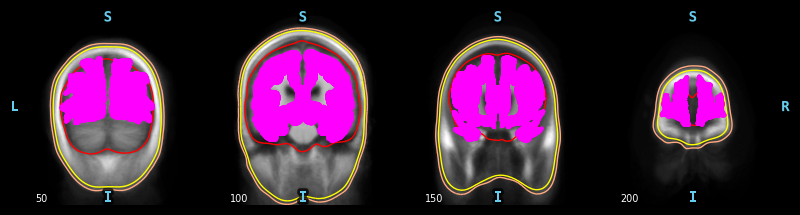

In [4]:
mne.viz.plot_bem(src=src, **plot_bem_kwargs)

Sphere                : origin at (0.0 0.0 40.0) mm
              radius  : 90.0 mm
grid                  : 5.0 mm
mindist               : 5.0 mm
MRI volume            : C:\Users\zhouz\mne_data\MNE-sample-data\subjects\fsaverage\mri\T1.mgz

Reading C:\Users\zhouz\mne_data\MNE-sample-data\subjects\fsaverage\mri\T1.mgz...

Setting up the sphere...
Surface CM = (   0.0    0.0   40.0) mm
Surface fits inside a sphere with radius   90.0 mm
Surface extent:
    x =  -90.0 ...   90.0 mm
    y =  -90.0 ...   90.0 mm
    z =  -50.0 ...  130.0 mm
Grid extent:
    x =  -95.0 ...   95.0 mm
    y =  -95.0 ...   95.0 mm
    z =  -50.0 ...  135.0 mm
57798 sources before omitting any.
24365 sources after omitting infeasible sources not within 0.0 - 90.0 mm.
20377 sources remaining after excluding the sources outside the surface and less than    5.0 mm inside.
Adjusting the neighborhood info.
Source space : MRI voxel -> MRI (surface RAS)
     0.005000  0.000000  0.000000     -95.00 mm
     0.000000  0.00

c:\Users\zhouz\mne-python\1.3.1_0\envs\mne\lib\site-packages\mne\viz\utils.py:151: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


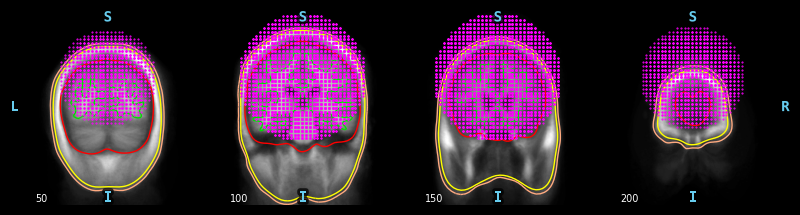

In [5]:
sphere = (0.0, 0.0, 0.04, 0.09)
vol_src = mne.setup_volume_source_space(
    subject, subjects_dir=subjects_dir, sphere=sphere, sphere_units='m',
    add_interpolator=False)  # just for speed!
print(vol_src)

mne.viz.plot_bem(src=vol_src, **plot_bem_kwargs)

Boundary surface file : C:\Users\zhouz\mne_data\MNE-sample-data\subjects\fsaverage\bem\inner_skull.surf
grid                  : 5.0 mm
mindist               : 5.0 mm
MRI volume            : C:\Users\zhouz\mne_data\MNE-sample-data\subjects\fsaverage\mri\T1.mgz

Reading C:\Users\zhouz\mne_data\MNE-sample-data\subjects\fsaverage\mri\T1.mgz...

Loaded bounding surface from C:\Users\zhouz\mne_data\MNE-sample-data\subjects\fsaverage\bem\inner_skull.surf (10242 nodes)
Surface CM = (  -0.5  -21.1    6.2) mm
Surface fits inside a sphere with radius   98.3 mm
Surface extent:
    x =  -75.3 ...   76.3 mm
    y = -113.4 ...   75.0 mm
    z =  -72.4 ...   88.2 mm
Grid extent:
    x =  -80.0 ...   80.0 mm
    y = -115.0 ...   75.0 mm
    z =  -75.0 ...   90.0 mm
43758 sources before omitting any.
29867 sources after omitting infeasible sources not within 0.0 - 98.3 mm.
Source spaces are in MRI coordinates.
Checking that the sources are inside the surface and at least    5.0 mm away (will take a few.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


    Found   800/14649 points outside using solid angles
    Total 17502/29867 points inside the surface
Interior check completed in 36559.2 ms
    12365 source space points omitted because they are outside the inner skull surface.
    3159 source space points omitted because of the    5.0-mm distance limit.
14343 sources remaining after excluding the sources outside the surface and less than    5.0 mm inside.
Adjusting the neighborhood info.
Source space : MRI voxel -> MRI (surface RAS)
     0.005000  0.000000  0.000000     -80.00 mm
     0.000000  0.005000  0.000000    -115.00 mm
     0.000000  0.000000  0.005000     -75.00 mm
     0.000000  0.000000  0.000000       1.00
MRI volume : MRI voxel -> MRI (surface RAS)
    -0.001000  0.000000  0.000000     128.00 mm
     0.000000  0.000000  0.001000    -128.00 mm
     0.000000 -0.001000  0.000000     128.00 mm
     0.000000  0.000000  0.000000       1.00
MRI volume : MRI (surface RAS) -> RAS (non-zero origin)


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   36.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   36.4s finished


     1.000000  0.000000  0.000000       0.00 mm
     0.000000  1.000000  0.000000       0.00 mm
     0.000000  0.000000  1.000000       0.00 mm
     0.000000  0.000000  0.000000       1.00
<SourceSpaces: [<volume, shape=(33, 39, 34), n_used=14343>] MRI (surface RAS) coords, subject 'fsaverage', ~6.5 MB>
Using surface: C:\Users\zhouz\mne_data\MNE-sample-data\subjects\fsaverage\bem\inner_skull.surf
Using surface: C:\Users\zhouz\mne_data\MNE-sample-data\subjects\fsaverage\bem\outer_skull.surf
Using surface: C:\Users\zhouz\mne_data\MNE-sample-data\subjects\fsaverage\bem\outer_skin.surf


c:\Users\zhouz\mne-python\1.3.1_0\envs\mne\lib\site-packages\mne\viz\utils.py:151: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


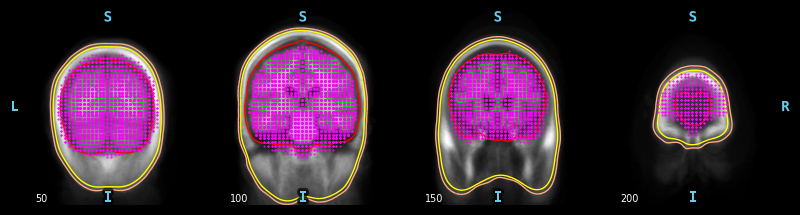

In [8]:
surface = subjects_dir / subject / 'bem' / 'inner_skull.surf'
# surface = 'C:/Users/zhouz/mne_data/MNE-sample-data/subjects/fsaverage/bem/inner_skull.surf'
vol_src = mne.setup_volume_source_space(
    subject, subjects_dir=subjects_dir, surface=surface,
    add_interpolator=False)  # Just for speed!
print(vol_src)

mne.viz.plot_bem(src=vol_src, **plot_bem_kwargs)

#40s

In [9]:
fig = mne.viz.plot_alignment(subject=subject, subjects_dir=subjects_dir,
                             surfaces='white', coord_frame='mri',
                             src=src)
mne.viz.set_3d_view(fig, azimuth=173.78, elevation=101.75,
                    distance=0.30, focalpoint=(-0.03, -0.01, 0.03))

In [10]:
# compute forward solution
conductivity = (0.3,)  # for single layer
# conductivity = (0.3, 0.006, 0.3)  # for three layers
model = mne.make_bem_model(subject='fsaverage', ico=4,
                           conductivity=conductivity,
                           subjects_dir=subjects_dir)
bem = mne.make_bem_solution(model)


Creating the BEM geometry...
Going from 5th to 4th subdivision of an icosahedron (n_tri: 20480 -> 5120)
inner skull CM is  -0.53 -21.10   6.21 mm
Surfaces passed the basic topology checks.
Complete.

Homogeneous model surface loaded.
Computing the linear collocation solution...
    Matrix coefficients...
        inner skull (2562) -> inner skull (2562) ...
    Inverting the coefficient matrix...
Solution ready.
BEM geometry computations complete.


In [11]:
fwd = mne.make_forward_solution(raw_fname, trans=trans, src=src, bem=bem,
                                meg=True, eeg=False, mindist=5.0, n_jobs=None,
                                verbose=True)
print(fwd)
# 5 min - 10.5 min

Source space          : <SourceSpaces: [<surface (lh), n_vertices=163842, n_used=163842>, <surface (rh), n_vertices=163842, n_used=163842>] MRI (surface RAS) coords, subject 'fsaverage', ~71.5 MB>
MRI -> head transform : sample_fsaverage_manual_trans.fif
Measurement data      : sample_audvis_raw.fif
Conductor model   : instance of ConductorModel
Accurate field computations
Do computations in head coordinates
Free source orientations

Read 2 source spaces a total of 327684 active source locations

Coordinate transformation: MRI (surface RAS) -> head
     0.989670 -0.078683 -0.119839      -3.12 mm
     0.088848  0.992665  0.081983      21.34 mm
     0.112510 -0.091784  0.989403      38.50 mm
     0.000000  0.000000  0.000000       1.00

Read 306 MEG channels from info
105 coil definitions read
Coordinate transformation: MEG device -> head
     0.991420 -0.039936 -0.124467      -6.13 mm
     0.060661  0.984012  0.167456       0.06 mm
     0.115790 -0.173570  0.977991      64.74 mm
     0.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


    Found      0/124992 points outside using solid angles
    Total 163842/163842 points inside the surface
Interior check completed in 240589.0 ms


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.0min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.0min finished


Checking surface interior status for 163842 points...
    Found  35929/163842 points inside  an interior sphere of radius   47.7 mm
    Found      0/163842 points outside an exterior sphere of radius   98.3 mm
    Found      0/127913 points outside using surface Qhull


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


    Found      0/127913 points outside using solid angles
    Total 163842/163842 points inside the surface
Interior check completed in 274156.7 ms


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.6min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.6min finished



Checking surface interior status for 306 points...
    Found   0/306 points inside  an interior sphere of radius   47.7 mm
    Found 306/306 points outside an exterior sphere of radius   98.3 mm
    Found   0/  0 points outside using surface Qhull
    Found   0/  0 points outside using solid angles
    Total 0/306 points inside the surface
Interior check completed in 42.0 ms

Composing the field computation matrix...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Computing MEG at 327684 source locations (free orientations)...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   56.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   56.5s finished



Finished.
<Forward | MEG channels: 306 | EEG channels: 0 | Source space: Surface with 327684 vertices | Source orientation: Free>


In [12]:
print(f'Before: {src}')
print(f'After:  {fwd["src"]}')

Before: <SourceSpaces: [<surface (lh), n_vertices=163842, n_used=163842>, <surface (rh), n_vertices=163842, n_used=163842>] MRI (surface RAS) coords, subject 'fsaverage', ~71.5 MB>
After:  <SourceSpaces: [<surface (lh), n_vertices=163842, n_used=163842>, <surface (rh), n_vertices=163842, n_used=163842>] head coords, subject 'fsaverage', ~71.5 MB>


In [13]:
leadfield = fwd['sol']['data']
print("Leadfield size : %d sensors x %d dipoles" % leadfield.shape)

Leadfield size : 306 sensors x 983052 dipoles


In [14]:
fwd_fixed = mne.convert_forward_solution(fwd, surf_ori=True, force_fixed=True,
                                         use_cps=True)
leadfield = fwd_fixed['sol']['data']
print("Leadfield size : %d sensors x %d dipoles" % leadfield.shape)

    Average patch normals will be employed in the rotation to the local surface coordinates....
    Converting to surface-based source orientations...
    [done]
Leadfield size : 306 sensors x 327684 dipoles


In [16]:
# mne.write_forward_solution('sample_fsaverage_fwd.fif', fwd, overwrite=False, verbose=None)
mne.write_forward_solution('sample_fsaverage_manual_all327684_fwd.fif', fwd, overwrite=False, verbose=None)


    Write a source space...
    [done]
    Write a source space...
    [done]
    2 source spaces written


In [19]:
# forward = mne.read_forward_solution('sample_fsaverage_fwd.fif',verbose=None)
forward = mne.read_forward_solution('sample_fsaverage_manual_all327684_fwd.fif',verbose=None)

Reading forward solution from c:\Users\zhouz\GitHub\MEG_EEG_Source_Localization\sample_fsaverage_manual_all327684_fwd.fif...
    Reading a source space...
    Computing patch statistics...
    Patch information added...
    [done]
    Reading a source space...
    Computing patch statistics...
    Patch information added...
    [done]
    2 source spaces read
    Desired named matrix (kind = 3523) not available
    Read MEG forward solution (327684 sources, 306 channels, free orientations)
    Source spaces transformed to the forward solution coordinate frame


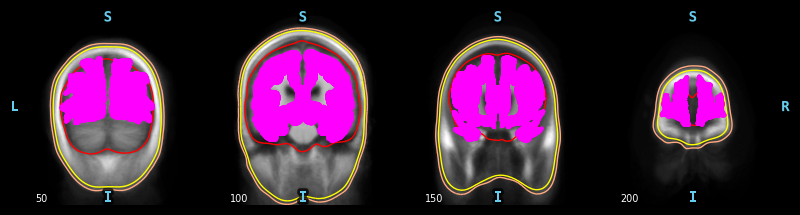

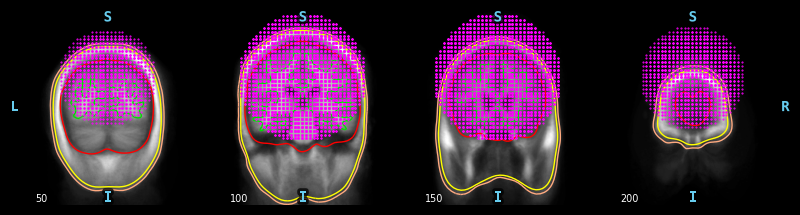

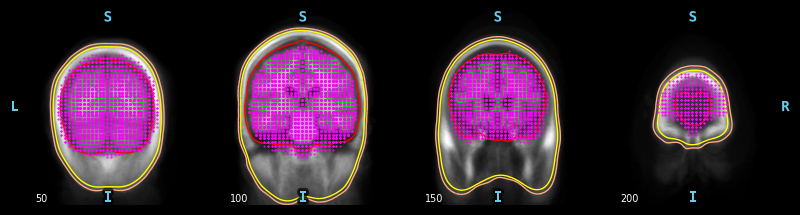

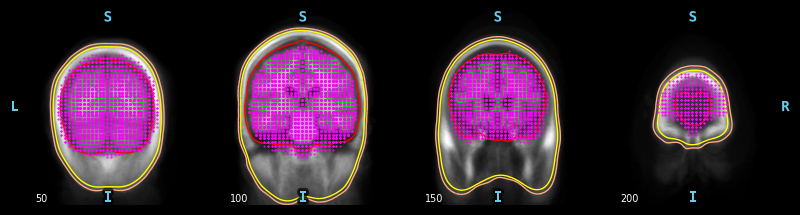

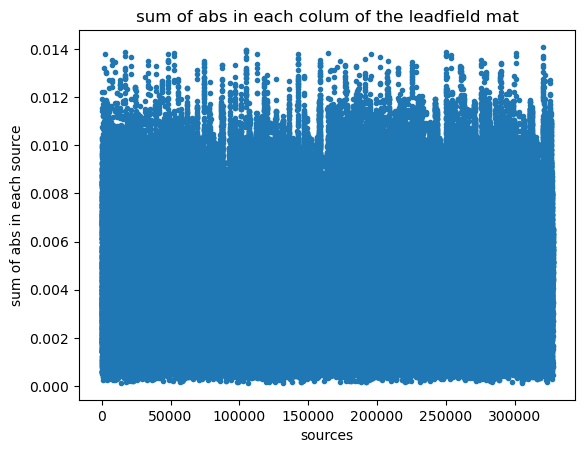

In [21]:
import numpy as np
from matplotlib import pyplot as plt

np.shape(leadfield)[1]

sumabslf=np.zeros((np.shape(leadfield)[1]))
for i in range(np.shape(leadfield)[1]):
    sumabslf[i]=np.sum(np.abs(leadfield[:,i]))
    
plt.figure()
plt.plot(range(np.shape(leadfield)[1]),sumabslf,'.')
plt.xlabel('sources'); plt.ylabel('sum of abs in each source')
plt.title('sum of abs in each colum of the leadfield mat')
plt.show()